In [4]:
import numpy as np
import pandas as pd
import re

# Modules for visualization
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

# Tools for preprocessing input data
from bs4 import BeautifulSoup
from nltk import word_tokenize
from nltk.corpus import stopwords
import nltk
from sklearn.feature_extraction.text import CountVectorizer 
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
import gensim

In [5]:
data = pd.read_csv("E:\\ML\\mlp-course-material\\MODULE 9 - Mini Projects\\2. Sentiment Analysis Kaggle\\sentiment_data.tsv", delimiter = "\t")

In [6]:
data.head()

,id,sentiment,review
0,5814_8,1,With all this stuff going down at the moment w...
1,2381_9,1,"\The Classic War of the Worlds\"" by Timothy Hi..."
2,7759_3,0,The film starts with a manager (Nicholas Bell)...
3,3630_4,0,It must be assumed that those who praised this...
4,9495_8,1,Superbly trashy and wondrously unpretentious 8...


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         25000 non-null  object
 1   sentiment  25000 non-null  int64 
 2   review     25000 non-null  object
dtypes: int64(1), object(2)
memory usage: 586.1+ KB


In [8]:
data = data[:2000]

In [9]:
data.head(10)

,id,sentiment,review
0,5814_8,1,With all this stuff going down at the moment w...
1,2381_9,1,"\The Classic War of the Worlds\"" by Timothy Hi..."
2,7759_3,0,The film starts with a manager (Nicholas Bell)...
3,3630_4,0,It must be assumed that those who praised this...
4,9495_8,1,Superbly trashy and wondrously unpretentious 8...
5,8196_8,1,I dont know why people think this is such a ba...
6,7166_2,0,"This movie could have been very good, but come..."
7,10633_1,0,I watched this video at a friend's house. I'm ...
8,319_1,0,"A friend of mine bought this film for £1, and ..."
9,8713_10,1,<br /><br />This movie is full of references. ...


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         2000 non-null   object
 1   sentiment  2000 non-null   int64 
 2   review     2000 non-null   object
dtypes: int64(1), object(2)
memory usage: 47.0+ KB


In [20]:
data["id"].nunique(0)

2000

In [21]:
data.describe()

,sentiment
count,2000.000000
mean,0.498500
std,0.500123
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [22]:
data.drop(["id"], axis = 1)

,sentiment,review
0,1,With all this stuff going down at the moment w...
1,1,"\The Classic War of the Worlds\"" by Timothy Hi..."
2,0,The film starts with a manager (Nicholas Bell)...
3,0,It must be assumed that those who praised this...
4,1,Superbly trashy and wondrously unpretentious 8...
...,...,...
1995,0,The monster from Enemy Mine somehow made his w...
1996,0,"This kind of film has become old hat by now, h..."
1997,1,The year 2005 saw no fewer than 3 filmed produ...
1998,0,"This was, so far, the worst movie I have seen ..."


In [23]:
data.shape

(2000, 3)

In [24]:
#Processing Messages

In [25]:
def processing(review):

    # Remove email addresses with 'emailaddr'    
    raw_review = re.sub('\b[\w\-.]+?@\w+?\.\w{2,4}\b', " ", review)
    
    # Remove URLs with 'httpaddr'
    raw_review = re.sub('(http[s]?\S+)|(\w+\.[A-Za-z]{2,4}\S*)', " ", raw_review) 

    # Remove non-letters        
    raw_review = re.sub("[^a-zA-Z]", " ", raw_review) 
    
    # Remove numbers
    raw_review = re.sub('\d+(\.\d+)?', " ", raw_review)

    # Convert to lower case, split into individual words
    words = raw_review.lower().split()                                             

    # Gather the list of stopwords in English Language
    stops = set(stopwords.words("english"))                  

    # Remove stop words and stemming the remaining words
    meaningful_words = [ps.stem(w) for w in words if not w in stops]   

    # Join the tokens back into one string separated by space, 
    # and return the result.
    return( " ".join( meaningful_words ))

In [26]:
#Corpus
clean_review_corpus = []
#Initialising Poster Stemmer
ps = PorterStemmer()

In [27]:
#Counting number of views
review_count = data["review"].size 

In [28]:
review_count

2000

In [31]:
for i in range(0,review_count):
    clean_review_corpus.append(processing(data["review"][i]))

In [32]:
data["review"][0] 

"With all this stuff going down at the moment with MJ i've started listening to his music, watching the odd documentary here and there, watched The Wiz and watched Moonwalker again. Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent. Moonwalker is part biography, part feature film which i remember going to see at the cinema when it was originally released. Some of it has subtle messages about MJ's feeling towards the press and also the obvious message of drugs are bad m'kay.<br /><br />Visually impressive but of course this is all about Michael Jackson so unless you remotely like MJ in anyway then you are going to hate this and find it boring. Some may call MJ an egotist for consenting to the making of this movie BUT MJ and most of his fans would say that he made it for the fans which if true is really nice of him.<br /><br />The actual feature film bit when it finally sta

In [33]:
clean_review_corpus[0]

'stuff go moment mj start listen music watch odd documentari watch wiz watch moonwalk mayb want get certain insight guy thought realli cool eighti mayb make mind whether guilti innoc moonwalk part biographi part featur film rememb go see cinema origin releas subtl messag mj feel toward press also obviou messag drug bad kay br br visual impress cours michael jackson unless remot like mj anyway go hate find bore may call mj egotist consent make movi mj fan would say made fan true realli nice br br actual featur film bit final start minut exclud smooth crimin sequenc joe pesci convinc psychopath power drug lord want mj dead bad beyond mj overheard plan nah joe pesci charact rant want peopl know suppli drug etc dunno mayb hate mj music br br lot cool thing like mj turn car robot whole speed demon sequenc also director must patienc saint came film kiddi bad sequenc usual director hate work one kid let alon whole bunch perform complex danc scene br br bottom line movi peopl like mj one level

In [34]:
#Preparing vectors for each message

In [36]:
cv = CountVectorizer()
data_input = cv.fit_transform(clean_review_corpus)
data_input = data_input.toarray()

In [37]:
data_input[0]

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

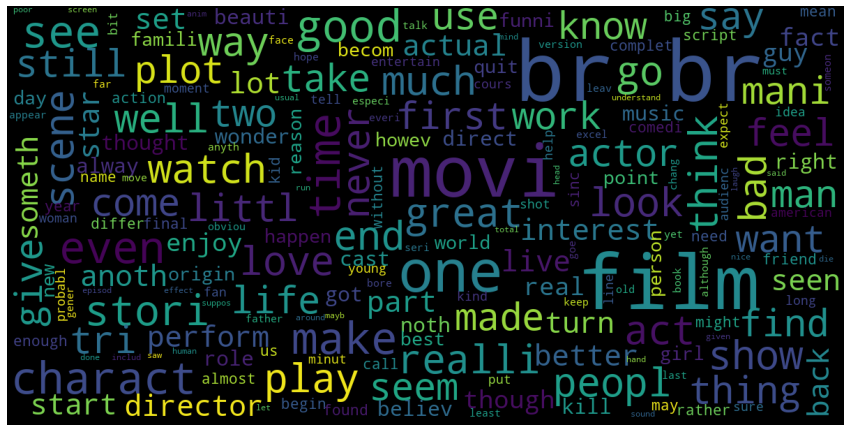

In [41]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(background_color='black', stopwords=stopwords,
        max_words=200,
        max_font_size=40, 
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
).generate(str(data))

    fig = plt.figure(1, figsize=(15, 15))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(clean_review_corpus)

Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.
Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\spars\anaconda3

  added / updated specs:
    - wordcloud=1.6.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-4.10.3               |   py38haa244fe_3         3.1 MB  conda-forge
    python_abi-3.8             |           2_cp38           4 KB  conda-forge
    wordcloud-1.6.0            |   py38hfa6e2cd_0         189 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         3.3 MB

The following NEW packages will be INSTALLED:

  python_abi         conda-forge/win-64::python_abi-3.8-2_cp38
  wordcloud          conda-forge/win-64::wordcloud-1.6.0-py38hfa6e2cd_0

The following packages will be UPDATED:

  conda 



==> WARNING: A newer version of conda exists. <==
  current version: 4.10.1
  latest version: 4.10.3

Please update conda by running

    $ conda update -n base -c defaults conda




In [42]:
#Applying classification models

<AxesSubplot:>

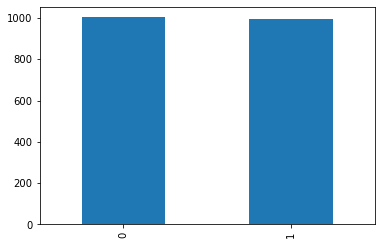

In [46]:
data_output = data["sentiment"]
data_output.value_counts().plot.bar()

In [47]:
#Splitting Data

In [50]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(data_input, data_output, test_size = 0.20, random_state = 0)


In [51]:
model_nvb = GaussianNB()
model_nvb.fit(xtrain,ytrain)

model_rf = RandomForestClassifier(n_estimators=1000, random_state=0)
model_rf.fit(xtrain, ytrain)

model_dt = tree.DecisionTreeClassifier()
model_dt.fit(xtrain, ytrain)

DecisionTreeClassifier()

In [52]:
#Prediction

In [53]:
prediction_nvb = model_nvb.predict(xtest)
prediction_rf = model_rf.predict(xtest)
prediction_dt = model_dt.predict(xtest)

In [55]:
print ("Accuracy for Naive Bayes : %0.5f \n\n" % accuracy_score(ytest, prediction_nvb))
print ("Classification Report Naive bayes: \n", classification_report(ytest, prediction_nvb))

Accuracy for Naive Bayes : 0.63000 


Classification Report Naive bayes: 
               precision    recall  f1-score   support

           0       0.65      0.71      0.68       219
           1       0.60      0.54      0.57       181

    accuracy                           0.63       400
   macro avg       0.63      0.62      0.62       400
weighted avg       0.63      0.63      0.63       400



In [56]:
print ("Accuracy for Decision Tree: %0.5f \n\n" % accuracy_score(ytest, prediction_dt))
print ("Classification Report Decision Tree: \n", classification_report(ytest, prediction_dt))

Accuracy for Decision Tree: 0.68000 


Classification Report Decision Tree: 
               precision    recall  f1-score   support

           0       0.75      0.63      0.68       219
           1       0.62      0.74      0.68       181

    accuracy                           0.68       400
   macro avg       0.68      0.69      0.68       400
weighted avg       0.69      0.68      0.68       400



In [57]:
print ("Accuracy for Random Forest: %0.5f \n\n" % accuracy_score(ytest, prediction_rf))
print ("Classification Report Random Forest: \n", classification_report(ytest, prediction_rf))

Accuracy for Random Forest: 0.82250 


Classification Report Random Forest: 
               precision    recall  f1-score   support

           0       0.88      0.78      0.83       219
           1       0.77      0.87      0.82       181

    accuracy                           0.82       400
   macro avg       0.82      0.83      0.82       400
weighted avg       0.83      0.82      0.82       400

